In [38]:
import xgboost as xgb
import shap
import numpy as np, os, sys
import joblib
import pandas as pd
from treeinterpreter import treeinterpreter as ti
import lime
import lime.lime_tabular
from matplotlib.pyplot import figure

#from feature_engineering import data_process
#from model_train import downsample


## Data preprocessing

In [39]:
if __name__ == "__main__":
    test =  pd.read_csv('./data/test_set_all_filled.csv')
    train =  pd.read_csv('./data/train_set_all_filled.csv')
    

In [40]:
# Create X_train,Y_train,X_test
    Y_train = train.SepsisLabel
    Y_test = test.SepsisLabel
    X_train = train.drop(['SepsisLabel','Patient_id'],axis =1 )
    X_test = test.drop(['SepsisLabel','Patient_id'],axis=1  )

In [41]:
    ## load model
    fitted_rf=  joblib.load("./saved_model/random_forest.sav")
    fitted_svc=  joblib.load("./saved_model/svc.sav")
    fitted_lr=  joblib.load("./saved_model/LR.sav")

## Explainer for random forest and svc

In [42]:
    # create an explainer for rf
    predict_fn_rf = lambda x: fitted_rf.predict_proba(x).astype(float)
    X = X_train.values
    explainer_rf = lime.lime_tabular.LimeTabularExplainer(X, mode='classification',feature_names = X_train.columns, class_names=['Non-Sepsis','Sepsis'] )
    # create an explainer for svc
    predict_fn_svc = lambda x: fitted_svc.predict_proba(x).astype(float)
    X = X_train.values
    explainer_svc = lime.lime_tabular.LimeTabularExplainer(X, mode='classification',feature_names = X_train.columns, class_names=['Non-Sepsis','Sepsis'] )
    # create an explainer for lr
    predict_fn_lr = lambda x: fitted_lr.predict_proba(x).astype(float)
    X = X_train.values
    explainer_lr = lime.lime_tabular.LimeTabularExplainer(X, mode='classification',feature_names = X_train.columns, class_names=['Non-Sepsis','Sepsis'] )

In [43]:
train_sepsis = np.sort(np.load('./data/train_sepsis.npy'))
train_nosepsis = np.sort(np.load('./data/train_nosepsis.npy'))

In [44]:
train_sepsis[0:20]

array(['p000009.psv', 'p000011.psv', 'p000015.psv', 'p000018.psv',
       'p000022.psv', 'p000028.psv', 'p000034.psv', 'p000042.psv',
       'p000053.psv', 'p000056.psv', 'p000058.psv', 'p000063.psv',
       'p000064.psv', 'p000078.psv', 'p000171.psv', 'p000185.psv',
       'p000188.psv', 'p000203.psv', 'p000206.psv', 'p000211.psv'],
      dtype='<U11')

In [45]:
train_nosepsis[0:20]

array(['p000001.psv', 'p000002.psv', 'p000003.psv', 'p000004.psv',
       'p000005.psv', 'p000006.psv', 'p000007.psv', 'p000008.psv',
       'p000010.psv', 'p000012.psv', 'p000013.psv', 'p000014.psv',
       'p000017.psv', 'p000019.psv', 'p000020.psv', 'p000021.psv',
       'p000023.psv', 'p000024.psv', 'p000026.psv', 'p000030.psv'],
      dtype='<U11')

In [46]:
train_set_whole =  np.concatenate((train_sepsis, train_nosepsis),axis=0) 

train_set_whole[0:30]

array(['p000009.psv', 'p000011.psv', 'p000015.psv', 'p000018.psv',
       'p000022.psv', 'p000028.psv', 'p000034.psv', 'p000042.psv',
       'p000053.psv', 'p000056.psv', 'p000058.psv', 'p000063.psv',
       'p000064.psv', 'p000078.psv', 'p000171.psv', 'p000185.psv',
       'p000188.psv', 'p000203.psv', 'p000206.psv', 'p000211.psv',
       'p000226.psv', 'p000260.psv', 'p000265.psv', 'p000272.psv',
       'p000283.psv', 'p000286.psv', 'p000311.psv', 'p000324.psv',
       'p000354.psv', 'p000359.psv'], dtype='<U11')

In [47]:
index_no = np.where((train_set_whole== 'p000013.psv'))[0][0]
psv_no = '000013'
train.loc[train['Patient_id'] == index_no]

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_id
147427,98.0,98.0,37.22,73.83,18.5,59.73,1,3,0,2502
147428,97.0,99.0,37.06,74.33,18.0,59.73,1,4,0,2502
147429,99.5,98.0,37.06,71.33,15.5,59.73,1,5,0,2502
147430,100.0,98.5,37.06,71.83,18.5,59.73,1,6,0,2502
147431,92.0,99.0,36.56,64.33,14.0,59.73,1,7,0,2502
147432,100.0,98.0,36.56,76.17,19.0,59.73,1,8,0,2502
147433,97.0,99.0,36.56,73.00,14.0,59.73,1,9,0,2502
147434,98.0,98.0,36.56,70.33,19.0,59.73,1,10,0,2502
147435,96.0,99.0,36.56,74.00,23.0,59.73,1,11,0,2502
147436,90.0,98.0,36.11,64.33,17.0,59.73,1,12,0,2502


In [48]:
len(train.loc[train['Patient_id'] == index_no])

39

In [49]:
for psv in train_sepsis:
    p_id  = np.where((train_set_whole== psv))[0][0]
    icu_stay = len(train.loc[train['Patient_id'] == p_id])
    if icu_stay ==len(train.loc[train['Patient_id'] == index_no]):
        
        break
print(p_id,psv)

73 p000967.psv


In [50]:
#index = np.where((train_set_whole== 'p000206.psv'))[0][0]
index_s = p_id

In [51]:
np.where((train_set_whole== psv))[0][0]

73

In [52]:
len(train.loc[train['Patient_id'] == index_s])

39

In [53]:
psv = psv.strip('.psv')
print(p_id,psv)

73 000967


In [54]:
train.loc[train['Patient_id'] == index_s]
# index_s

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_id
4653,82.5,100.0,38.33,90.5,19.00,72.85,0,1,0,73
4654,82.5,100.0,38.33,90.5,19.00,72.85,0,2,0,73
4655,82.5,100.0,38.33,84.5,22.75,72.85,0,3,0,73
4656,86.5,100.0,37.44,81.0,22.50,72.85,0,4,0,73
4657,85.0,99.0,37.44,73.0,22.00,72.85,0,5,0,73
4658,83.0,97.0,37.44,72.0,21.00,72.85,0,6,0,73
4659,85.0,98.0,37.44,78.0,20.50,72.85,0,7,0,73
4660,86.0,100.0,37.28,78.0,21.00,72.85,0,8,0,73
4661,82.0,100.0,37.28,72.0,17.00,72.85,0,9,0,73
4662,86.0,99.0,37.28,69.0,17.00,72.85,0,10,0,73


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  
 

### Non-septic patient

In [56]:
icu_os = 10
choosen_instance_no = train.loc[train['Patient_id'] == index_no].drop(['Patient_id','SepsisLabel'],axis = 1).values[icu_os]
lime_instance_no = train.loc[train['Patient_id'] == index_no].drop(['Patient_id','SepsisLabel'],axis = 1)
lime_instance_no

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS
147427,98.0,98.0,37.22,73.83,18.5,59.73,1,3
147428,97.0,99.0,37.06,74.33,18.0,59.73,1,4
147429,99.5,98.0,37.06,71.33,15.5,59.73,1,5
147430,100.0,98.5,37.06,71.83,18.5,59.73,1,6
147431,92.0,99.0,36.56,64.33,14.0,59.73,1,7
147432,100.0,98.0,36.56,76.17,19.0,59.73,1,8
147433,97.0,99.0,36.56,73.00,14.0,59.73,1,9
147434,98.0,98.0,36.56,70.33,19.0,59.73,1,10
147435,96.0,99.0,36.56,74.00,23.0,59.73,1,11
147436,90.0,98.0,36.11,64.33,17.0,59.73,1,12


In [57]:
exp_rf_no = explainer_rf.explain_instance(choosen_instance_no, 
                                          predict_fn_rf,
                                          num_features=np.shape(X_train)[1])
#exp_rf_no.show_in_notebook(show_all=True) 
L_rf_no = exp_rf_no.as_list()
y = []

In [58]:
L_rf_no

[('11.00 < ICULOS <= 21.00', -0.030275024098967426),
 ('15.50 < Resp <= 18.00', -0.007775066277894618),
 ('96.00 < O2Sat <= 98.00', -0.006941208038325466),
 ('51.66 < Age <= 64.00', -0.003628960378526052),
 ('83.00 < HR <= 95.00', -0.003068875075185459),
 ('71.00 < MAP <= 81.00', -0.0026395628709071587),
 ('0.00 < Gender <= 1.00', 0.001963721410809151),
 ('Temp <= 36.40', 0.0003977774269281512)]

In [59]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'Age', 'Gender', 'ICULOS',
       'SepsisLabel', 'Patient_id'],
      dtype='object')

In [60]:
for feature in X_train.columns:
    for l in L_rf_no:
        if feature in l[0]:
            y.append(l[1])
lime_data= {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y
lime_data['measurement'] = list(lime_instance_no.iloc[icu_os].values )
lime_pd_nosepsis = pd.DataFrame.from_dict(lime_data)
lime_pd_nosepsis

,features,impact,measurement
0,HR,-0.003069,89.00
1,O2Sat,-0.006941,98.00
2,Temp,0.000398,36.11
3,MAP,-0.002640,74.33
4,Resp,-0.007775,18.00
5,Age,-0.003629,59.73
6,Gender,0.001964,1.00
7,ICULOS,-0.030275,13.00


In [61]:
predict_fn_rf(lime_instance_no.values)[icu_os]

array([0.99, 0.01])

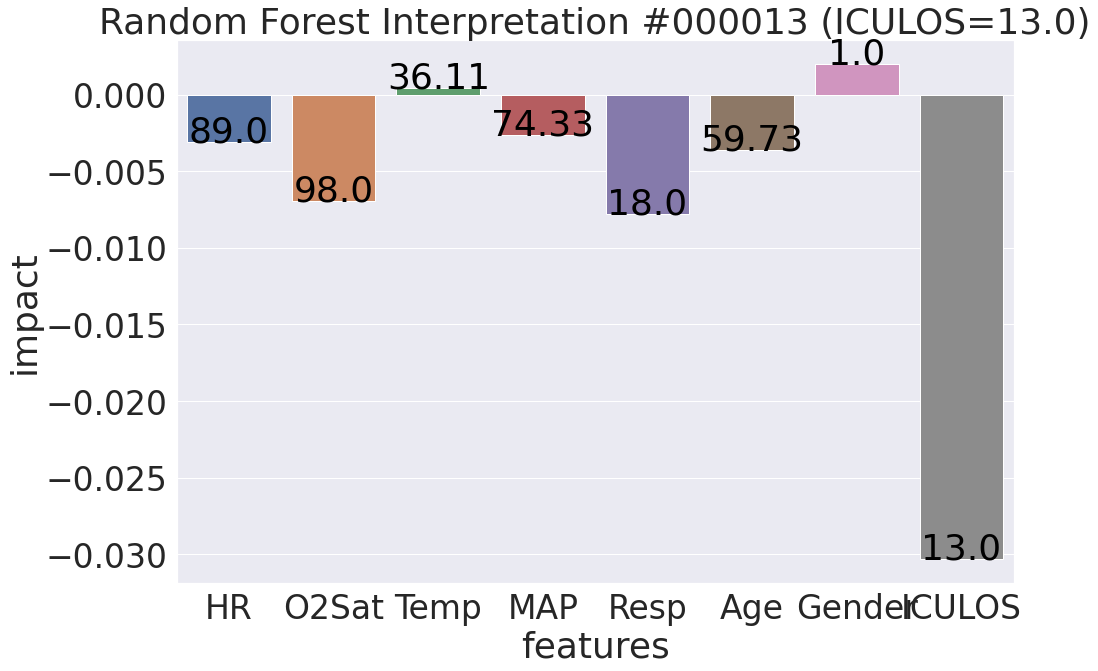

In [62]:
figure(figsize=(15, 10) )
sns.set(font_scale=3)
ax=sns.barplot(x='features',y='impact',data= lime_pd_nosepsis)
title = "Random Forest Interpretation "  +'#'+psv_no+ ' (ICULOS='+str(choosen_instance_no[-1])+')'
plt.title(title)
for index, row in lime_pd_nosepsis.iterrows():
    ax.text(index,row.impact, row.measurement , color='black', ha="center")
#plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
# ax1.set(ylim=(-0.03, 0.03))

fig = ax.get_figure()
# fig1.savefig("./lime_explain_plots/p000013_rf(ICULOS=2).eps")
# fig1.savefig("./lime_explain_plots/p000013_rf(ICULOS=2).png")
str_nosepsis =  psv_no+ 'ICULOS'+str(choosen_instance_no[-1])
fig.savefig('./lime_explain_plots/'+ 'RF_'+'p'+str_nosepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'RF_'+'p'+str_nosepsis + '.png')

In [63]:
exp_svc_no = explainer_svc.explain_instance(choosen_instance_no, 
                                            predict_fn_svc,
                                            num_features=np.shape(X_train)[1])
L_svc_no = exp_svc_no.as_list()
y=[]
for feature in X_train.columns:
    for l in L_svc_no:
        if feature in l[0]:
            y.append(l[1])
lime_data = {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y
lime_data['measurement'] = list(lime_instance_no.iloc[icu_os].values )
lime_pd_nosepsis = pd.DataFrame.from_dict(lime_data)
lime_pd_nosepsis 

,features,impact,measurement
0,HR,0.000820,89.00
1,O2Sat,-0.000217,98.00
2,Temp,-0.000014,36.11
3,MAP,0.003153,74.33
4,Resp,0.000548,18.00
5,Age,-0.000997,59.73
6,Gender,-0.000985,1.00
7,ICULOS,0.002483,13.00


In [64]:
L_svc_no

[('71.00 < MAP <= 81.00', 0.0031528259779295283),
 ('11.00 < ICULOS <= 21.00', 0.0024827703531341834),
 ('51.66 < Age <= 64.00', -0.0009966922751756158),
 ('0.00 < Gender <= 1.00', -0.0009847370335702927),
 ('83.00 < HR <= 95.00', 0.0008204737609797977),
 ('15.50 < Resp <= 18.00', 0.0005480392973645844),
 ('96.00 < O2Sat <= 98.00', -0.00021717730791479645),
 ('Temp <= 36.40', -1.3682357679240728e-05)]

In [65]:
predict_fn_svc(lime_instance_no.values)[icu_os]

array([0.97324954, 0.02675046])

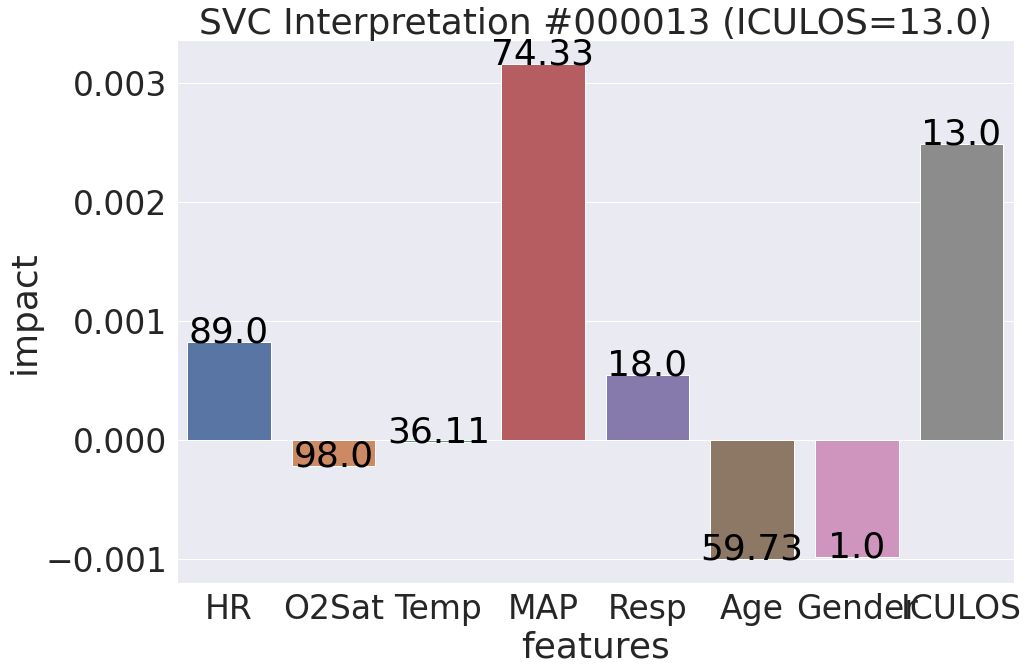

In [66]:
figure(figsize=(15, 10) )
sns.set(font_scale=3)
title = "SVC Interpretation "  +'#'+psv_no+ ' (ICULOS='+str(choosen_instance_no[-1])+')'
plt.title(title)
ax=sns.barplot(x='features',y='impact',data= lime_pd_nosepsis)
for index, row in lime_pd_nosepsis.iterrows():
    ax.text(index,row.impact, row.measurement , color='black', ha="center")
# ax2.set(ylim=(-0.03, 0.03))
fig = ax.get_figure()
str_nosepsis =  psv_no+ 'ICULOS'+str(choosen_instance_no[-1])
fig.savefig('./lime_explain_plots/'+ 'SVC_'+'p'+str_nosepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'SVC_'+'p'+str_nosepsis + '.png')

In [67]:
exp_lr_no = explainer_lr.explain_instance(choosen_instance_no, 
                                          predict_fn_lr,
                                          num_features=np.shape(X_train)[1])
L_lr_no = exp_lr_no.as_list()
y = []
for feature in X_train.columns:
    for l in L_lr_no:
        if feature in l[0]:
            y.append(l[1])
lime_data = {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y
lime_data['measurement'] = list(lime_instance_no.iloc[icu_os].values )
lime_pd_nosepsis = pd.DataFrame.from_dict(lime_data)
lime_pd_nosepsis

,features,impact,measurement
0,HR,0.000893,89.00
1,O2Sat,0.000579,98.00
2,Temp,-0.008132,36.11
3,MAP,0.001518,74.33
4,Resp,-0.000986,18.00
5,Age,-0.000297,59.73
6,Gender,0.001824,1.00
7,ICULOS,-0.006121,13.00


In [68]:
L_lr_no

[('Temp <= 36.40', -0.008131815083206952),
 ('11.00 < ICULOS <= 21.00', -0.006120705221795653),
 ('0.00 < Gender <= 1.00', 0.001824232390831776),
 ('71.00 < MAP <= 81.00', 0.0015177232923824298),
 ('15.50 < Resp <= 18.00', -0.0009861136361801635),
 ('83.00 < HR <= 95.00', 0.0008929130659787244),
 ('96.00 < O2Sat <= 98.00', 0.0005786274553163179),
 ('51.66 < Age <= 64.00', -0.00029664883427514343)]

In [69]:
predict_fn_lr(lime_instance_no.values)[icu_os]

array([0.9893915, 0.0106085])

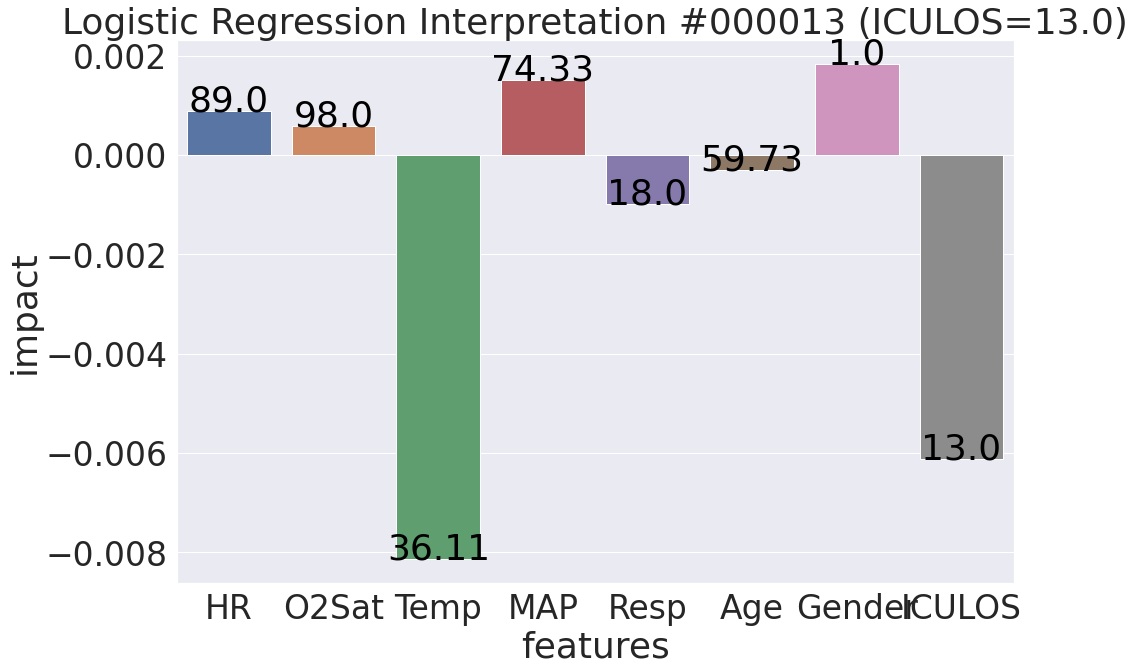

In [70]:
figure(figsize=(15, 10) )
sns.set(font_scale=3)
title = "Logistic Regression Interpretation "  +'#'+psv_no+ ' (ICULOS='+str(choosen_instance_no[-1])+')'
plt.title(title)
ax=sns.barplot(x='features',y='impact', data= lime_pd_nosepsis)
for index, row in lime_pd_nosepsis.iterrows():
    ax.text(index,row.impact, row.measurement , color='black', ha="center")
# ax3.set(ylim=(-0.03, 0.03))
fig = ax.get_figure()
str_nosepsis =  psv_no+ 'ICULOS'+str(choosen_instance_no[-1])
fig.savefig('./lime_explain_plots/'+ 'LR_'+'p'+str_nosepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'LR_'+'p'+str_nosepsis + '.png')

In [71]:
for i, l in enumerate(L_rf_no):
    print(i,l)
    
for i, l in enumerate(L_svc_no):
    print(i,l)
for i, l in enumerate(L_lr_no):
    print(i,l)

0 ('11.00 < ICULOS <= 21.00', -0.030275024098967426)
1 ('15.50 < Resp <= 18.00', -0.007775066277894618)
2 ('96.00 < O2Sat <= 98.00', -0.006941208038325466)
3 ('51.66 < Age <= 64.00', -0.003628960378526052)
4 ('83.00 < HR <= 95.00', -0.003068875075185459)
5 ('71.00 < MAP <= 81.00', -0.0026395628709071587)
6 ('0.00 < Gender <= 1.00', 0.001963721410809151)
7 ('Temp <= 36.40', 0.0003977774269281512)
0 ('71.00 < MAP <= 81.00', 0.0031528259779295283)
1 ('11.00 < ICULOS <= 21.00', 0.0024827703531341834)
2 ('51.66 < Age <= 64.00', -0.0009966922751756158)
3 ('0.00 < Gender <= 1.00', -0.0009847370335702927)
4 ('83.00 < HR <= 95.00', 0.0008204737609797977)
5 ('15.50 < Resp <= 18.00', 0.0005480392973645844)
6 ('96.00 < O2Sat <= 98.00', -0.00021717730791479645)
7 ('Temp <= 36.40', -1.3682357679240728e-05)
0 ('Temp <= 36.40', -0.008131815083206952)
1 ('11.00 < ICULOS <= 21.00', -0.006120705221795653)
2 ('0.00 < Gender <= 1.00', 0.001824232390831776)
3 ('71.00 < MAP <= 81.00', 0.0015177232923824298)


In [72]:
lime_instance_no.iloc[icu_os]['HR']

89.0

In [73]:
loc = 0
length = 3*len(X_train.columns)
lime_compare_df_nosepsis = pd.DataFrame() 
#  ['feature ','impact', 'model','measurement'] 
feature_list = []
impact_list  = []
model_list = []
measure_list = []
for feature_name in X_train.columns:
    for i, l in enumerate(L_rf_no):
        #feature_name = ''.join([i for i in l[0] if i.isalpha()])
        #if feature_name =='OSat':
            #feature_name = 'O2Sat'
        #temp = []
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
    model_list.append('RF')
    measure_list.append(lime_instance_no.iloc[icu_os][feature_name])

    for i, l in enumerate(L_svc_no):
        #feature_name = ''.join([i for i in l[0] if i.isalpha()])
        #if feature_name =='OSat':
            #feature_name = 'O2Sat'
        #temp = []
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
    model_list.append('SVC')
    measure_list.append(lime_instance_no.iloc[icu_os][feature_name])
        
    for i, l in enumerate(L_lr_no):
        #feature_name = ''.join([i for i in l[0] if i.isalpha()])
        #if feature_name =='OSat':
            #feature_name = 'O2Sat'
        #temp = []
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
    model_list.append('LR')
    measure_list.append(lime_instance_no.iloc[icu_os][feature_name])

lime_compare_df_nosepsis['feature'] = feature_list
lime_compare_df_nosepsis['impact'] = impact_list
lime_compare_df_nosepsis['model'] = model_list
lime_compare_df_nosepsis['measurement'] = measure_list
# lime_compare_df_nosepsis

In [74]:
lime_compare_df_nosepsis


,feature,impact,model,measurement
0,HR,-0.003069,RF,89.00
1,HR,0.000820,SVC,89.00
2,HR,0.000893,LR,89.00
3,O2Sat,-0.006941,RF,98.00
4,O2Sat,-0.000217,SVC,98.00
5,O2Sat,0.000579,LR,98.00
6,Temp,0.000398,RF,36.11
7,Temp,-0.000014,SVC,36.11
8,Temp,-0.008132,LR,36.11
9,MAP,-0.002640,RF,74.33


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


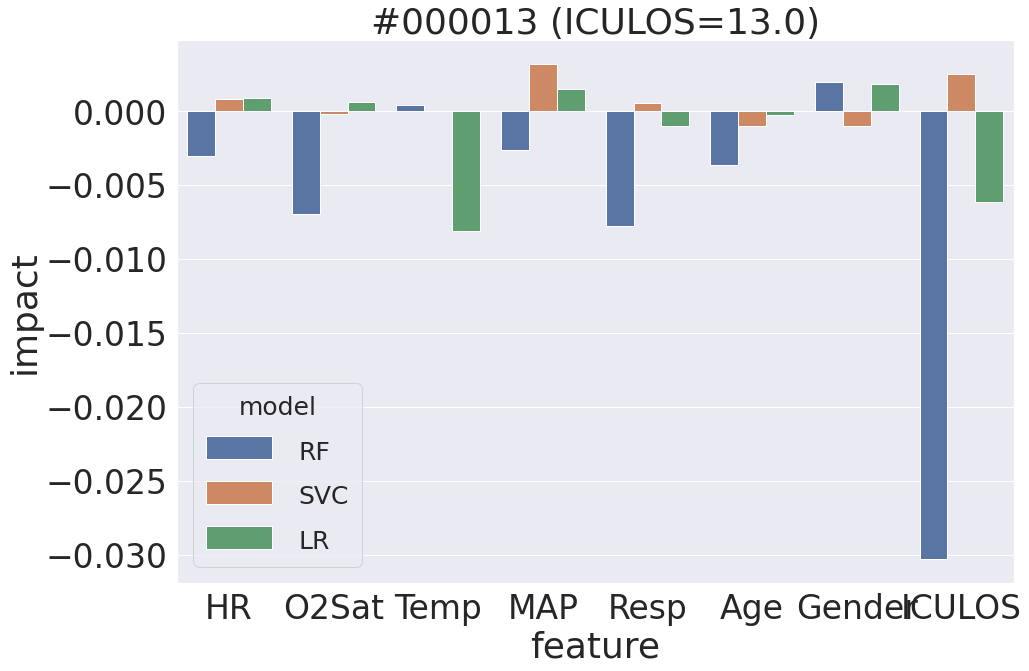

In [77]:
figure(figsize=(15, 10) )
sns.set(font_scale=3)
 


ax = sns.barplot(x="feature", y="impact", hue="model",data= lime_compare_df_nosepsis)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title

    
lime_pd_nosepsis

#for index, row in lime_pd_nosepsis.iterrows():
    #print(index)
    #print(row)

    #ax.text(X_train.columns[index], row.impact, row.measurement , color='black', ha="center")
#for index, row in lime_compare_df_nosepsis[0:7].iterrows():
    #ax.text(index, row.impact, row.measurement , color='black', ha="center")
# ax.set(ylim=(-0.03, 0.03))
title =  '#'+psv_no+ ' (ICULOS='+str(choosen_instance_no[-1])+')'
plt.title(title)
fig = ax.get_figure()

str_nosepsis =  psv_no+ 'ICULOS'+str(int(choosen_instance_no[-1]))
fig.savefig('./lime_explain_plots/'+ 'p'+str_nosepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'p'+str_nosepsis + '.png')

### Septic Patient

In [85]:
#choosen_instance_no = X_train.loc[[633]].values[0]
icu_os = -4
lime_instance = train.loc[train['Patient_id'] == index_s].drop(['Patient_id','SepsisLabel'],axis = 1)
choosen_instance = train.loc[train['Patient_id'] == index_s].drop(['Patient_id','SepsisLabel'],axis = 1).values[icu_os]
choosen_instance

array([ 79.  , 100.  ,  37.67,  75.  ,  18.  ,  72.85,   0.  ,  36.  ])

In [86]:
lime_instance.iloc[icu_os]

HR         79.00
O2Sat     100.00
Temp       37.67
MAP        75.00
Resp       18.00
Age        72.85
Gender      0.00
ICULOS     36.00
Name: 4688, dtype: float64

In [87]:
exp_rf = explainer_rf.explain_instance(choosen_instance, 
                                          predict_fn_rf,
                                          num_features=np.shape(X_train)[1]) 
L_rf = exp_rf.as_list()
y = []
for feature in X_train.columns:
    for l in L_lr:
        if feature in l[0]:
            y.append(l[1])
lime_data = {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y
lime_data['measurement'] = list(lime_instance.iloc[icu_os].values)
lime_pd_sepsis = pd.DataFrame.from_dict(lime_data)

predict_fn_rf(lime_instance )[icu_os]

array([0.39, 0.61])

In [88]:
L_rf

[('ICULOS > 34.00', 0.08206076830477338),
 ('Temp > 37.30', 0.028800741113773242),
 ('15.50 < Resp <= 18.00', -0.006138646252551481),
 ('72.00 < HR <= 83.00', -0.005699129352984434),
 ('Gender <= 0.00', -0.0032419335704233837),
 ('64.00 < Age <= 74.00', -0.0029519787936131137),
 ('71.00 < MAP <= 81.00', -0.0028674359125241576),
 ('O2Sat > 99.50', 0.0003702736968105635)]

In [89]:
lime_pd_sepsis

,features,impact,measurement
0,HR,-0.003254,79.00
1,O2Sat,-0.000281,100.00
2,Temp,0.010767,37.67
3,MAP,0.002444,75.00
4,Resp,-0.001347,18.00
5,Age,0.000602,72.85
6,Gender,-0.001475,0.00
7,ICULOS,0.017928,36.00


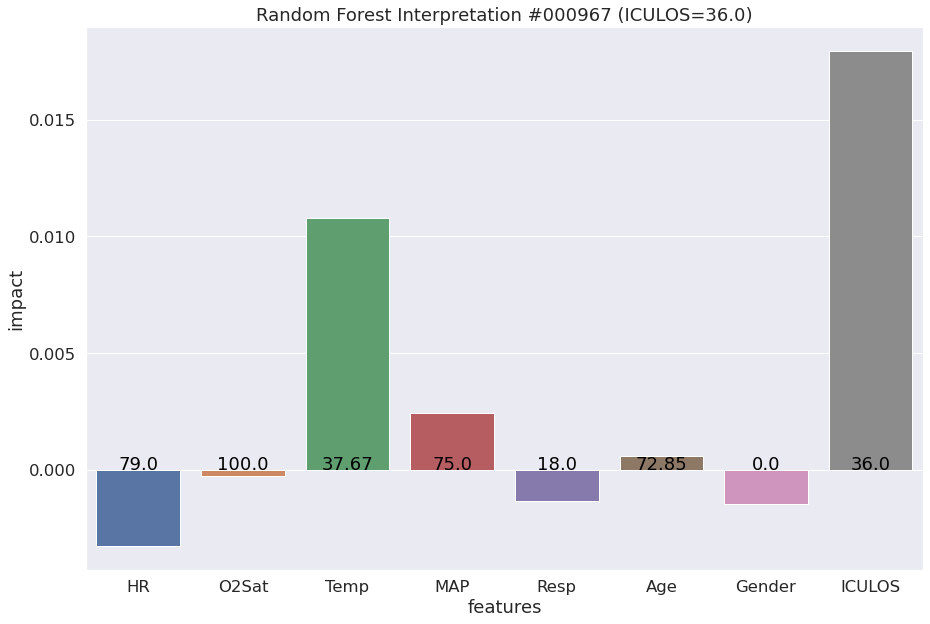

In [90]:
figure(figsize=(15, 10) )
sns.set(font_scale=1.5)
title = "Random Forest Interpretation "  +'#'+psv+ ' (ICULOS='+str(choosen_instance[-1])+')'
plt.title(title)
ax=sns.barplot(x='features',y='impact',data= lime_pd_sepsis)
for index,row in lime_pd_sepsis.iterrows():
    ax.text(index,0, row.measurement, color='black', ha="center")
# ax1.set(ylim=(-0.03, 0.03))
fig = ax.get_figure()
str_sepsis =  psv+ 'ICULOS'+str(choosen_instance[-1])
fig.savefig('./lime_explain_plots/'+ 'RF_'+'p'+str_sepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'RF_'+'p'+str_sepsis + '.png')

In [91]:
exp_svc = explainer_svc.explain_instance(choosen_instance, 
                                         predict_fn_svc,
                                         num_features=np.shape(X_train)[1])
L_svc = exp_svc.as_list()
y = []
for feature in X_train.columns:
    for l in L_svc:
        if feature in l[0]:
            y.append(l[1])
lime_data = {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y
lime_data['measurement'] = list(lime_instance.iloc[icu_os].values )
lime_pd_sepsis = pd.DataFrame.from_dict(lime_data)
predict_fn_svc(lime_instance )[icu_os]

array([0.97615822, 0.02384178])

In [92]:
L_svc 

[('ICULOS > 34.00', -0.0035272325553126044),
 ('71.00 < MAP <= 81.00', 0.0030480336142725928),
 ('Gender <= 0.00', 0.001052644021921192),
 ('72.00 < HR <= 83.00', -0.0010206954087954255),
 ('15.50 < Resp <= 18.00', 0.0008376154975970703),
 ('O2Sat > 99.50', 0.0004814958480859094),
 ('Temp > 37.30', 0.0004311636496653506),
 ('64.00 < Age <= 74.00', 0.0001720937311234791)]

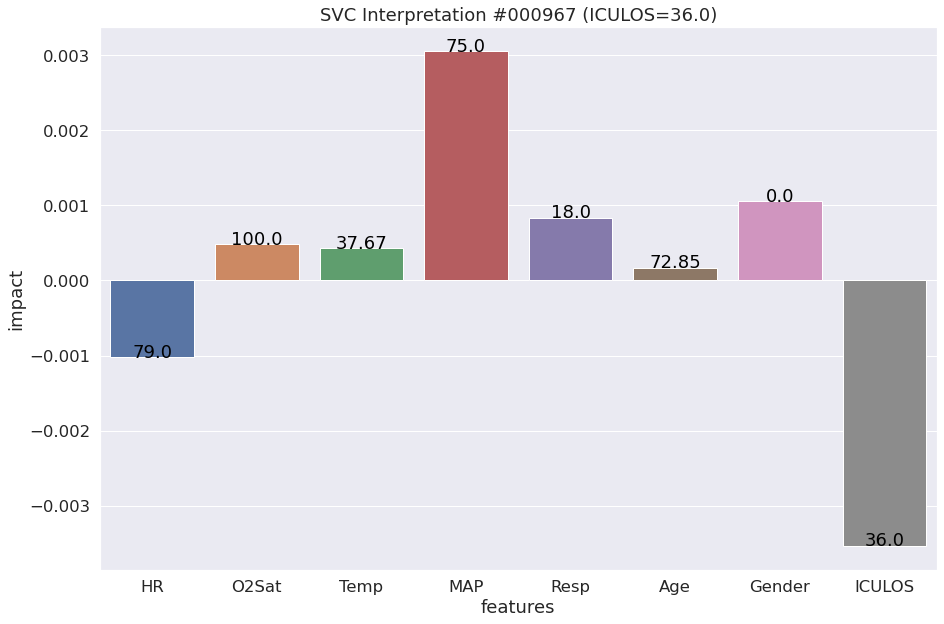

In [93]:
figure(figsize=(15, 10) )
sns.set(font_scale=1.5)
title = "SVC Interpretation "  +'#'+psv+ ' (ICULOS='+str(choosen_instance[-1])+')'
plt.title(title)
ax=sns.barplot(x='features',y='impact',data= lime_pd_sepsis)
for index, row in lime_pd_sepsis.iterrows():
    ax.text(index,row.impact, row.measurement , color='black', ha="center")
# ax2.set(ylim=(-0.03, 0.03))
fig = ax.get_figure()
 
str_sepsis =  psv+ 'ICULOS'+str(choosen_instance[-1])
fig.savefig('./lime_explain_plots/'+ 'SVC_'+'p'+str_sepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'SVC_'+'p'+str_sepsis + '.png')

In [94]:
exp_lr = explainer_lr.explain_instance(choosen_instance, 
                                       predict_fn_lr,
                                       num_features=np.shape(X_train)[1])

L_lr = exp_lr.as_list()
y = []
# lime_instance_no = train.loc[train['Patient_id'] == index_no].drop(['Patient_id','SepsisLabel'],axis = 1)
for feature in X_train.columns:
    for l in L_lr:
        if feature in l[0]:
            y.append(l[1])
lime_data = {}
lime_data['features'] = list(X_train.columns)
lime_data['impact'] = y

lime_data['measurement'] = list(lime_instance.iloc[icu_os].values )
lime_pd_sepsis = pd.DataFrame.from_dict(lime_data)

In [95]:
lime_pd_sepsis 

,features,impact,measurement
0,HR,-0.003731,79.00
1,O2Sat,0.000412,100.00
2,Temp,0.010544,37.67
3,MAP,0.000705,75.00
4,Resp,-0.001015,18.00
5,Age,0.000341,72.85
6,Gender,-0.000777,0.00
7,ICULOS,0.018192,36.00


In [96]:
predict_fn_lr(lime_instance )[icu_os]

array([0.97899672, 0.02100328])

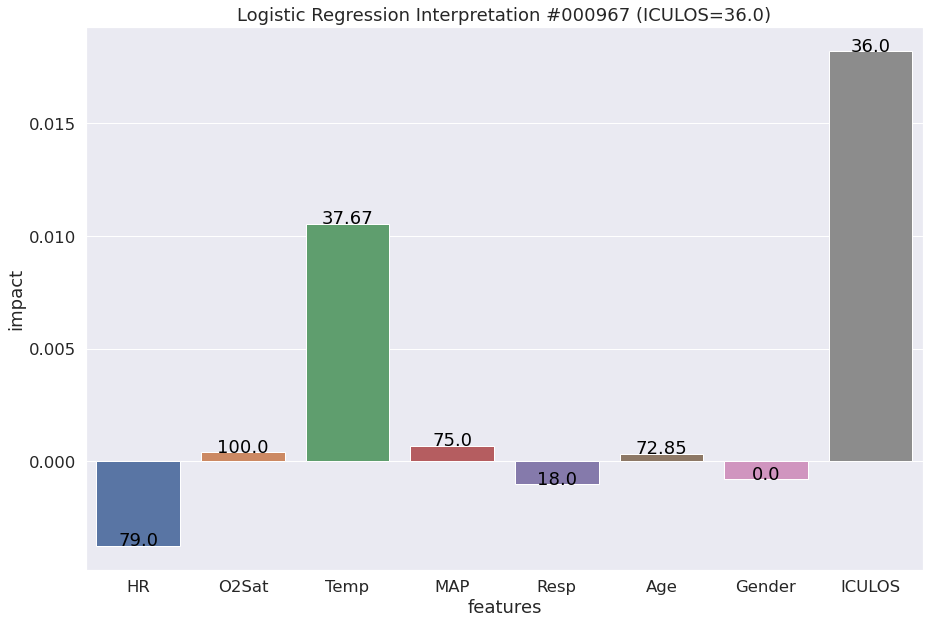

In [97]:
figure(figsize=(15, 10) )
sns.set(font_scale=1.5)
title = "Logistic Regression Interpretation "  +'#'+psv+ ' (ICULOS='+str(choosen_instance[-1])+')'
plt.title(title)
ax=sns.barplot(x='features',y='impact', data= lime_pd_sepsis)
for index, row in lime_pd_sepsis.iterrows():
    ax.text(index,row.impact, row.measurement , color='black', ha="center")
# ax3.set(ylim=(-0.03, 0.03))
fig = ax.get_figure()

str_sepsis =  psv+ 'ICULOS'+str(choosen_instance[-1])
fig.savefig('./lime_explain_plots/'+ 'LR_'+'p'+str_sepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'LR_'+'p'+str_sepsis + '.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


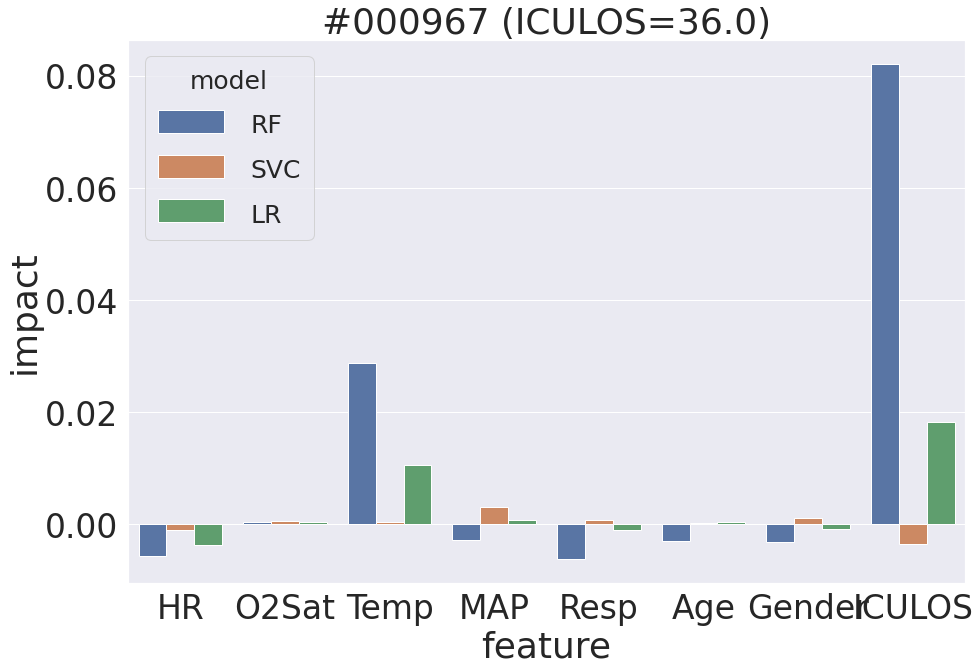

In [104]:
loc = 0
length = 3*len(X_train.columns)
lime_compare_df_sepsis = pd.DataFrame() 
#  ['feature ','impact', 'model','measurement'] 
feature_list = []
impact_list  = []
model_list = []
measure_list = []
for feature_name in X_train.columns:
    for i, l in enumerate(L_rf):
        #feature_name = ''.join([i for i in l[0] if i.isalpha()])
        #temp = []
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
    model_list.append('RF')
    measure_list.append(lime_instance .iloc[icu_os][feature_name])
    for i, l in enumerate(L_svc):
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
         
    model_list.append('SVC')
    measure_list.append(lime_instance .iloc[icu_os][feature_name])
    for i, l in enumerate(L_lr):
        if feature_name in l[0]:
            feature_list.append(feature_name)
            impact_list.append(l[1])
    model_list.append('LR')
    measure_list.append(lime_instance .iloc[icu_os][feature_name])

lime_compare_df_sepsis['feature'] = feature_list
lime_compare_df_sepsis['impact'] = impact_list
lime_compare_df_sepsis['model'] = model_list
lime_compare_df_sepsis['measurement'] = measure_list
# lime_compare_df_nosepsis




figure(figsize=(15, 10) )
sns.set(font_scale=3)
 



ax = sns.barplot(x="feature", y="impact", hue="model" ,
                data= lime_compare_df_sepsis)
#for index, row in lime_pd_sepsis.iterrows():
    #ax.text(index, -0.008, row.measurement , color='black', ha="center")
# ax.set(ylim=(-0.03, 0.03))
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
title =  '#'+psv+ ' (ICULOS='+str(choosen_instance[-1])+')'
plt.title(title)
fig = ax.get_figure()

str_sepsis =  psv+ 'ICULOS'+str(int(choosen_instance[-1]))
fig.savefig('./lime_explain_plots/'+ 'p'+str_sepsis + '.eps')
fig.savefig('./lime_explain_plots/'+ 'p'+str_sepsis + '.png')


## Explain the results of Paitent

#### Non septic patient

In [105]:
#read the data of a secific patient
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
test =  pd.read_csv('./data/test_set_all_filled.csv')
train =  pd.read_csv('./data/train_set_all_filled.csv')
    
patient_i = train.loc[train['Patient_id'] == index_no].drop(['SepsisLabel','Patient_id'],axis =1 ).reset_index(drop=True)

In [106]:
patient_i

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS
0,98.0,98.0,37.22,73.83,18.5,59.73,1,3
1,97.0,99.0,37.06,74.33,18.0,59.73,1,4
2,99.5,98.0,37.06,71.33,15.5,59.73,1,5
3,100.0,98.5,37.06,71.83,18.5,59.73,1,6
4,92.0,99.0,36.56,64.33,14.0,59.73,1,7
5,100.0,98.0,36.56,76.17,19.0,59.73,1,8
6,97.0,99.0,36.56,73.00,14.0,59.73,1,9
7,98.0,98.0,36.56,70.33,19.0,59.73,1,10
8,96.0,99.0,36.56,74.00,23.0,59.73,1,11
9,90.0,98.0,36.11,64.33,17.0,59.73,1,12


In [107]:
np.shape(patient_i.loc[[0]].values[0])[0]

8

In [108]:
patient_i.values[0]

array([98.  , 98.  , 37.22, 73.83, 18.5 , 59.73,  1.  ,  3.  ])

In [109]:
patient_i.loc[[0]] 

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS
0,98.0,98.0,37.22,73.83,18.5,59.73,1,3


In [110]:
feature_dict_RF = {}
for f in X_train.columns:
    feature_dict_RF[f] = []
for j in range(len(patient_i)):
    #choosen_instance = patient_i.loc[[j]].values[0]
    choosen_instance = patient_i.values[j]
    exp_rf = explainer_rf.explain_instance(choosen_instance, predict_fn_rf, num_features=np.shape(X_train)[0])
    L = exp_rf.as_list()
     
    for f in patient_i.columns:
        for l in L: 
            if f in l[0]:
                feature_dict_RF[f].append(l[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


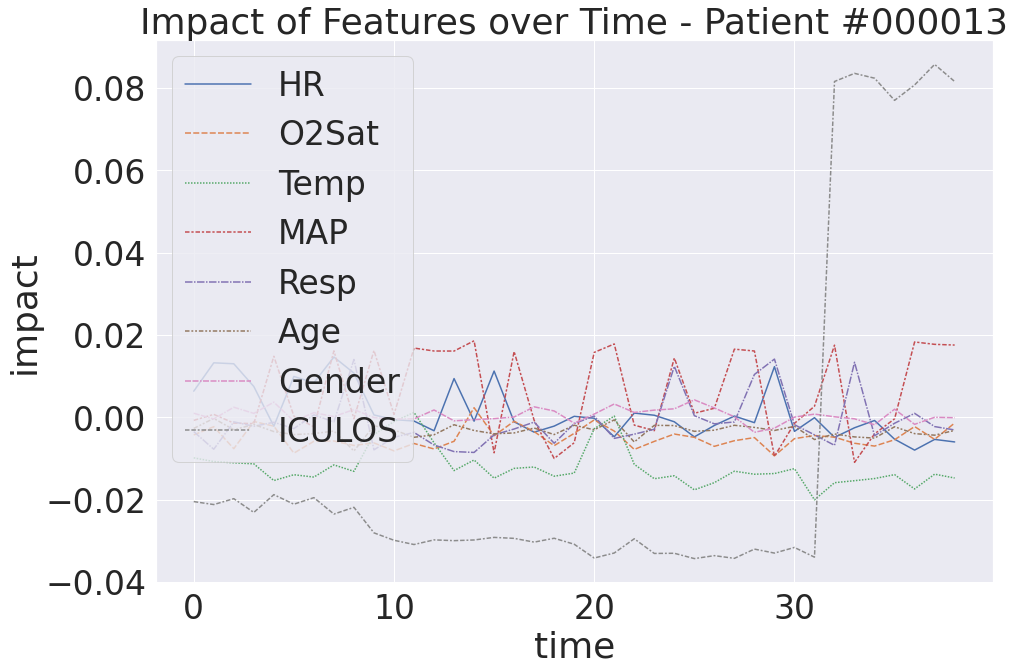

In [111]:
df_RF = pd.DataFrame.from_dict(feature_dict_RF)

df_label_RF =  df_RF.copy()

df_label_RF['SepsisLabel'] =train.loc[train['Patient_id'] == index_no]['SepsisLabel'].values
sepsis_scale = df_label_RF.loc[df_label_RF['SepsisLabel'] == 1].index 

figure(figsize=(15, 10) )
sns.set(font_scale=3)
 
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title

plt.axvline(x=np.min(sepsis_scale ), linestyle = '--', color = 'k' )
plt.axvline(x=np.max(sepsis_scale ), linestyle = '--', color = 'b'  )
sns.lineplot(data=df_RF,linestyle = '-')
title = "Impact of Features over Time - Patient" + " #" +  psv_no
plt.title(title)
plt.xlabel("time")
plt.ylabel("impact")
plt.savefig('./lime_explain_plots/'+'p'+ psv_no+'_time'+'.eps')
plt.savefig('./lime_explain_plots/'+'p'+ psv_no+'_time'+'.png')

#### Septic patient

In [112]:
patient_ii = train.loc[train['Patient_id'] == index_s].drop(['SepsisLabel','Patient_id'],axis =1 ).reset_index(drop=True)

In [113]:
patient_ii 

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS
0,82.5,100.0,38.33,90.5,19.00,72.85,0,1
1,82.5,100.0,38.33,90.5,19.00,72.85,0,2
2,82.5,100.0,38.33,84.5,22.75,72.85,0,3
3,86.5,100.0,37.44,81.0,22.50,72.85,0,4
4,85.0,99.0,37.44,73.0,22.00,72.85,0,5
5,83.0,97.0,37.44,72.0,21.00,72.85,0,6
6,85.0,98.0,37.44,78.0,20.50,72.85,0,7
7,86.0,100.0,37.28,78.0,21.00,72.85,0,8
8,82.0,100.0,37.28,72.0,17.00,72.85,0,9
9,86.0,99.0,37.28,69.0,17.00,72.85,0,10


In [114]:
feature_dict_RF1 = {}
for f in X_train.columns:
    feature_dict_RF1[f] = []
for j in range(len(patient_i)):
    #choosen_instance = patient_i.loc[[j]].values[0]
    choosen_instance = patient_ii.values[j]
    exp_rf = explainer_rf.explain_instance(choosen_instance, predict_fn_rf, num_features=np.shape(X_train)[0])
    L = exp_rf.as_list()
     
    for f in patient_ii.columns:
        for l in L: 
            if f in l[0]:
                feature_dict_RF1[f].append(l[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


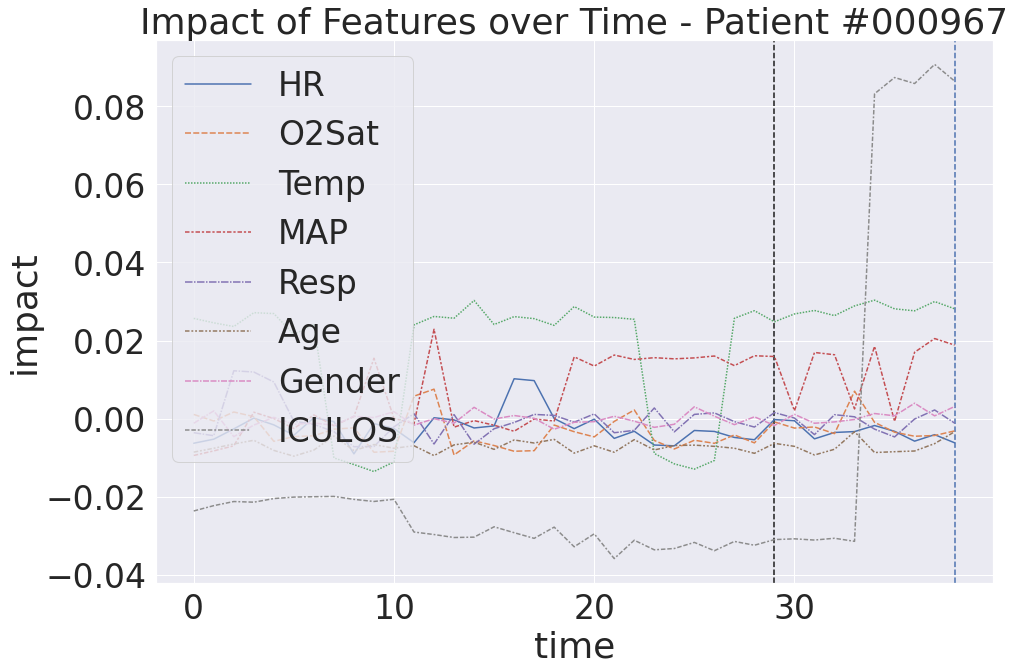

In [115]:
df_RF1 = pd.DataFrame.from_dict(feature_dict_RF1)

df_label_RF1 =  df_RF1.copy()

df_label_RF1['SepsisLabel'] =train.loc[train['Patient_id'] == index_s]['SepsisLabel'].values
sepsis_scale1 = df_label_RF1.loc[df_label_RF1['SepsisLabel'] == 1].index 


figure(figsize=(15, 10) )
sns.set(font_scale=3)
 
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title


plt.axvline(x=np.min(sepsis_scale1), linestyle = '--', color = 'k' )
plt.axvline(x=np.max(sepsis_scale1 ), linestyle = '--', color = 'b'  )
sns.lineplot(data=df_RF1,linestyle = '-')
title = "Impact of Features over Time - Patient" + " #" +  psv
plt.title(title)
plt.xlabel("time")
plt.ylabel("impact")
plt.savefig('./lime_explain_plots/'+'p'+ psv+'_time'+'.eps')
plt.savefig('./lime_explain_plots/'+'p'+ psv+'_time'+'.png')


In [151]:
# # read the data of a secific patient
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     import matplotlib.ticker as ticker
#     trainp = pd.read_csv('./data/train_rf.csv')
#     testp = pd.read_csv('./data/test_rf.csv')
    
#     for i in range(2,4):
        
#         patient_i = testp.loc[testp['Patient_id'] == i]
#         loc_i_1 = 0
#         for m in range(i):
#             loc_i_1 =  loc_i_1 + len(testp.loc[testp['Patient_id'] == m]) 
             

#         patient_i.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
#         'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' ,'Lactate','Magnesium','Phosphate',
#         'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Fibrinogen', 'Platelets',
#         "Glucose", 'Unit1', "Unit2", "HospAdmTime", 'Patient_id', 'DBP', 'SBP'], axis = 1, inplace = True)  

#     # Convert categorical variables into dummy/indicator variables
#         test_processedp = pd.get_dummies(patient_i)
#         test_processedp = test_processedp.fillna(test_processedp.mean())  
#     # Create X_train,Y_train,X_test
#         Py_test = test_processedp.SepsisLabel
#         Px_test = test_processedp.drop(['SepsisLabel'],axis=1  )
#         #Px_test.loc[[loc_i_1+1]].values[0]
#         # create the feature - impact dictionary
#         feature_dict = {}
#         for f in X_test.columns:
#             feature_dict[f] = []
#         for j in range(len(test_processedp)):
#             choosen_instance = Px_test.loc[[loc_i_1+j]].values[0]
#             exp = explainer.explain_instance( choosen_instance, predict_fn_rf,  
#                              num_features=np.shape(Px_test)[1])
#             L = exp.as_list()
#             for l in L:  
#                 for f in X_test.columns:
#                     if f in l[0]:
#                         feature_dict[f].append(l[1])

#             #file_path = 'explainations_LIME/Patient_' + str(i) +'_time_'+str(j) +'.html'      
#             #exp.save_to_file(file_path, labels=None, predict_proba=True, show_predicted_value=True )

#         ## plot the results
#         df = pd.DataFrame.from_dict(feature_dict)
#         df1 = pd.DataFrame.from_dict(feature_dict)
#         df1['SepsisLabel'] = Py_test.values
#         col_name = 'SepsisLabel'
#         first_col = df1.pop(col_name)
#         df1.insert(0, col_name, first_col)
        
#         fig_id = i+1
#         plt.figure(fig_id)
#         sns.lineplot(data=df1 )
#         title = "Impact of Features - Patient" + " #" + str(i) 
#         plt.title(title)
#         plt.xlabel("time")
#         plt.ylabel("impact")
#         filename = "Patient" + "#" + str(i)+".eps"
#         plt.savefig(filename)